In [1]:
# import capytaine as cpy
import autograd.numpy as np
import matplotlib.pyplot as plt
import xarray as xr
# from math import comb

import wecopttool as wot
import os
import Pioneer_Inverted_Pendulum as pip
from scipy.optimize import Bounds

## set colorblind-friendly colormap for plots
plt.style.use('tableau-colorblind10')

wot.set_loglevel('ERROR', capytaine=False)
data_path = os.path.join('pioneer_data')

In [2]:
wavefreq = 0.325
f1_reg = wavefreq
nfreq_reg = 5
amplitude = 0.15

waves_regular = wot.waves.regular_wave(f1_reg, nfreq_reg, wavefreq, amplitude)

In [3]:
NPIP = pip.NonlinearInvertedPendulumPTO(f1 = f1_reg,
                                        nfreq = nfreq_reg,
                                        ndof = 1,
                                        control_type = 'PI')

In [4]:
LinPIP = pip.LinearizedInvertedPendulumPTO(f1 = f1_reg,
                                        nfreq = nfreq_reg,
                                        ndof = 1,
                                        control_type = 'PI')

In [5]:
wec_nl = pip.PioneerBuoy.from_empirical_data(f1_reg, nfreq_reg, 
                                            f_add = NPIP.f_add,
                                            constraints = NPIP.constraints)
wec_lin = pip.PioneerBuoy.from_empirical_data(f1_reg, nfreq_reg, 
                                            f_add = LinPIP.f_add,
                                            constraints = LinPIP.constraints)  

In [6]:
res_lin = LinPIP.solve(wec_lin, waves_regular)
x_wec_0, x_opt_0 = wec_lin.decompose_state(res_lin[0].x)


wave 0, exit mode: 0, nit: 30, cntr: PI, avg. power: -21.08W


In [8]:
res_nl = NPIP.solve(wec_nl, waves_regular, x_wec_0, x_opt_0)


wave 0, exit mode: 0, nit: 17, cntr: PI, avg. power: -28.35W


In [20]:
nsubsteps = 5
wec_fdom_list, wec_tdom_list, pen_fdom_list, pen_tdom_list = NPIP.post_process(wec_nl, res_nl, waves_regular, nsubsteps=nsubsteps)
wec_fdom, wec_tdom, pen_fdom, pen_tdom = wec_fdom_list[0], wec_tdom_list[0], pen_fdom_list[0], pen_tdom_list[0]

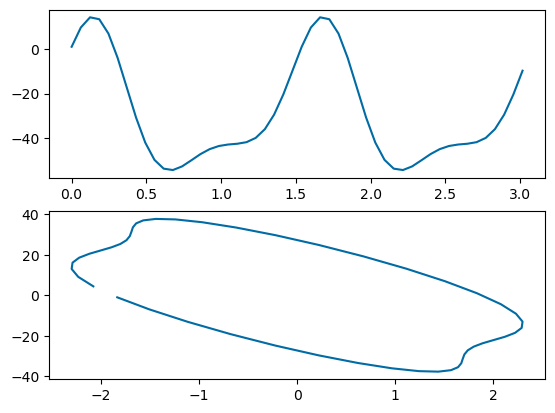

In [21]:

fig, axes = plt.subplots(2,1)
axes[0].plot(t,pen_tdom['epower'])

axes[1].plot(pen_tdom['rel_vel'], pen_tdom['torque'].sel(type = 'Generator'))
